In [21]:
import numpy as np
import networkx as nx
import ipywidgets as widgets
from matplotlib import pyplot as plt, colors, colormaps
from spring_layout import central_spring_layout, LAYER_TO_RADIUS
from graph_functions import filter_connected_component
from visualization_functions import scale_node_sizes, colorize_nodes_by_layer, layer_l2_scatter_plot, COLORS

In [22]:
def draw_graph(graph, pos, node_size=None, node_color=None, save_file=False):
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))
    nx.draw_networkx(
        graph, pos,
        with_labels=False, arrows=False, width=0.05,
        node_size=node_size, node_color=node_color,
        ax=ax
    )
    for layer, color in enumerate(COLORS):
        circle = plt.Circle((0, 0), LAYER_TO_RADIUS[layer], color=color, fill=False, linewidth=0.75)
        ax.add_patch(circle)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    if save_file:
        plt.savefig(f'./layout_results/{save_file}')
    ax.plot();

In [35]:
# graph = nx.read_edgelist('web-EPA/web-EPA.edges', delimiter=' ', nodetype=int)
# graph = nx.read_edgelist('bio-CE-GT/bio-CE-GT.edges', delimiter=' ', nodetype=int,
#                          data=(("some_weight", float), ))
graph = nx.read_edgelist('bio-CE-PG/bio-CE-PG.edges', delimiter=' ', nodetype=int,
                         data=(("some_weight", float), ))
print(f'Nodes: {graph.number_of_nodes()} | Edges: {graph.number_of_edges()}')
graph = filter_connected_component(graph)
print(f'Nodes: {graph.number_of_nodes()} | Edges: {graph.number_of_edges()}')
print(f'Maximum degree node: {max(graph.nodes, key=lambda x: graph.degree[x])}')

Nodes: 1871 | Edges: 47754
Nodes: 1692 | Edges: 47309
Maximum degree node: 57


In [36]:
# CENTRAL_NODE = 75
# INITIAL_POS = {CENTRAL_NODE: (0, 0)}
# FIXED_NODES = [CENTRAL_NODE]
# l = None
# ALPHA = 3
# RADIUS_THRESHOLD = 4

# CENTRAL_NODE = 15
# INITIAL_POS = {CENTRAL_NODE: (0, 0)}
# FIXED_NODES = [CENTRAL_NODE]
# l = None
# ALPHA = 6
# RADIUS_THRESHOLD = 3

# CENTRAL_NODE = 62
# INITIAL_POS = {CENTRAL_NODE: (0, 0)}
# FIXED_NODES = [CENTRAL_NODE]
# l = None
# ALPHA = 3
# RADIUS_THRESHOLD = 5

CENTRAL_NODE = 57
INITIAL_POS = {CENTRAL_NODE: (0, 0)}
FIXED_NODES = [CENTRAL_NODE]
l = None
ALPHA = 10
RADIUS_THRESHOLD = 2

In [37]:
%%time
spring_modified, poses, modified_graph, central_forces, common_forces, group_to_nodes = central_spring_layout(
    graph,
    CENTRAL_NODE,
    INITIAL_POS,
    FIXED_NODES,
    l=l,
    radius_threshold=RADIUS_THRESHOLD,
    alpha=ALPHA,
    iterations=50
)

CPU times: user 5.5 s, sys: 30.5 ms, total: 5.53 s
Wall time: 5.53 s


In [38]:
layers = np.array(list(nx.get_node_attributes(modified_graph, "layer").values()))
node_sizes = scale_node_sizes(layers)
node_colors = colorize_nodes_by_layer(layers)

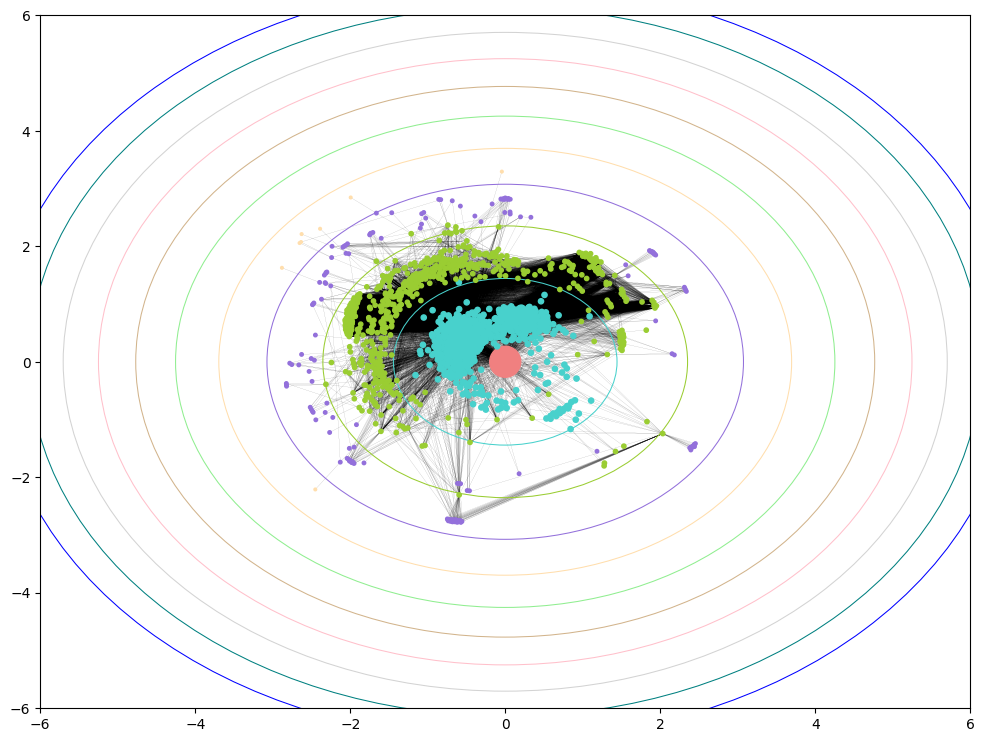

In [40]:
draw_graph(
    graph, spring_modified, node_size=node_sizes, node_color=node_colors,
    save_file='bio-CE-PG--max-degree--edge-filtering.png'
)

In [16]:
@widgets.interact(
    step=(0, len(poses) - 1, 1)
)
def draw_graph_widget(step):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))
    
    pos = dict(zip(modified_graph, poses[step]))
    ax1.clear()
    ax1.set_title("Graph layout")
    nx.draw_networkx(modified_graph, pos,
                     with_labels=False, arrows=False, node_size=node_sizes, width=0.05, ax=ax1)
    ax1.set_xlim(-6, 6)
    ax1.set_ylim(-6, 6)
    ax1.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    for layer, color in enumerate(COLORS):
        circle = plt.Circle((0, 0), LAYER_TO_RADIUS[layer], color=color, fill=False, linewidth=0.75)
        ax1.add_patch(circle)

    
    central_force = central_forces[step]
    common_force = common_forces[step]
    ax2.clear()
    ax2.set_title("Forces")
    ax2.bar([1, 3], [central_force, common_force], tick_label=["central", "common"], color=['skyblue', 'teal'])
    ax2.set_ylabel("forces");

interactive(children=(IntSlider(value=24, description='step', max=49), Output()), _dom_classes=('widget-intera…

In [17]:
%%time
spring = nx.spring_layout(graph)

CPU times: user 1.64 s, sys: 5.28 ms, total: 1.65 s
Wall time: 1.65 s


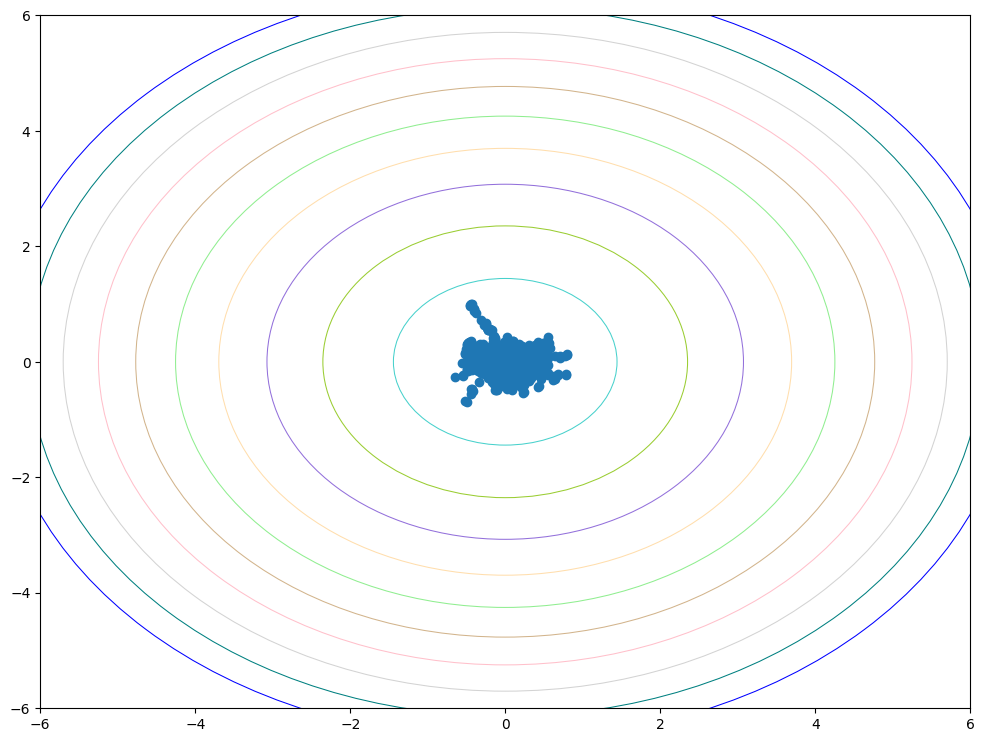

In [18]:
draw_graph(graph, spring)

0.9005915881345594
0.7841591433362904


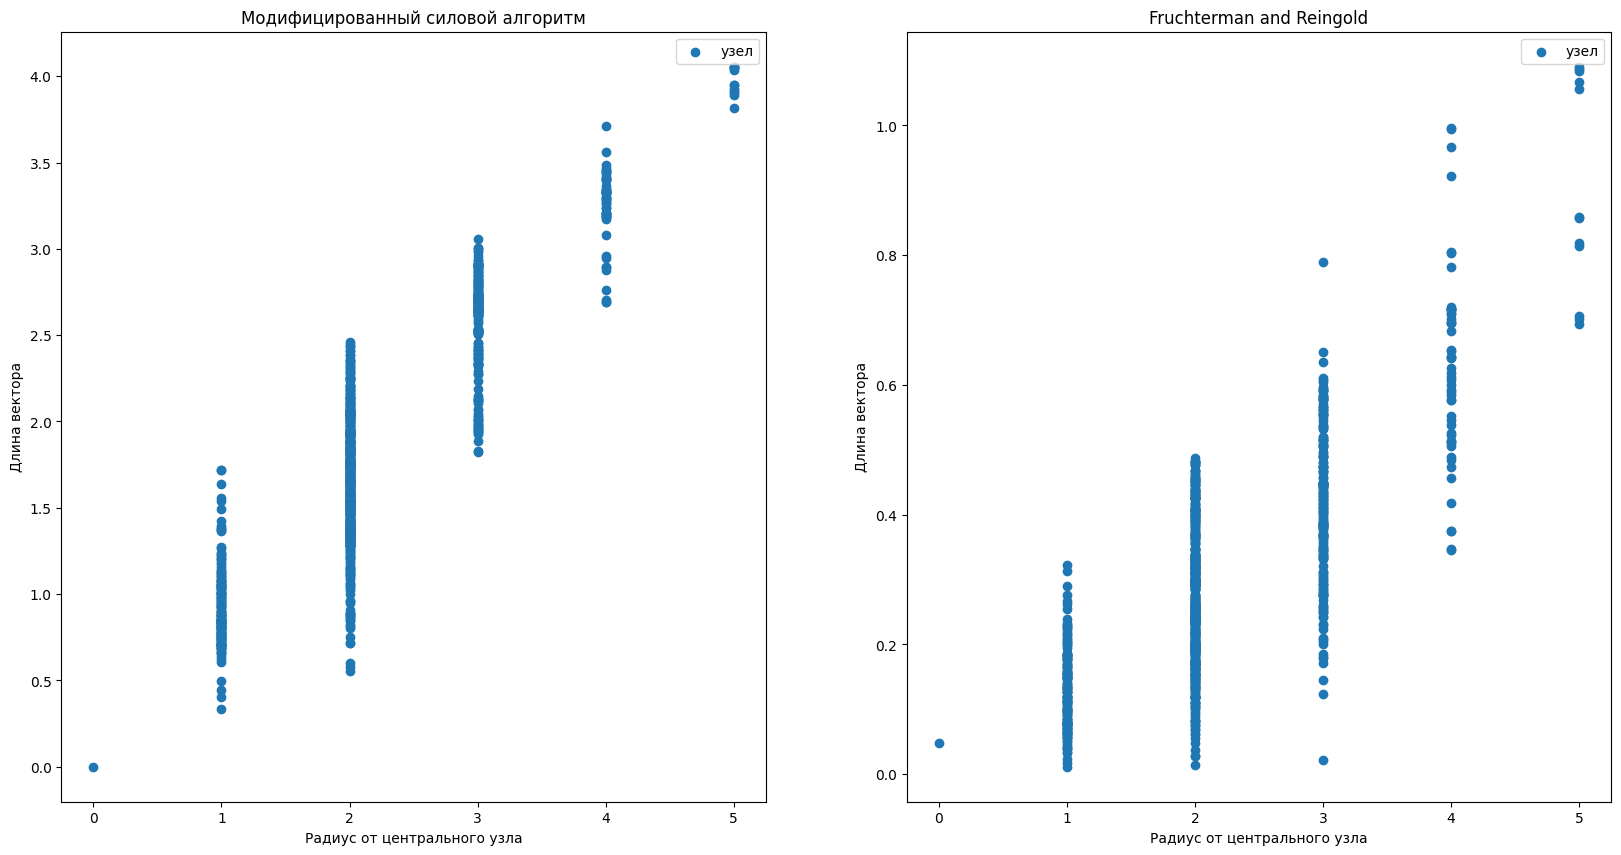

In [19]:
layer_l2_scatter_plot(layers, layers, poses[-1], np.array(list(spring.values())))